In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
puntos_Conocidos = 'mary_and_temperature_preferences.data'

datos = np.loadtxt(open(puntos_Conocidos, 'r'), dtype={
    'names' : ('temperatura','viento','percepción'),'formats':('i4','i4','S4')
})

In [4]:
punto_Conocido_X = []
punto_Conocido_Y = []
percepcion_Conocida = []
temp_inicial = 5
temp_final = 30
viento_inicial = 0
viento_final = 10
for i in range(0,len(datos)):
    punto_Conocido_X.append(datos[i][0])
    punto_Conocido_Y.append(datos[i][1])
    percepcion_Conocida.append(datos[i][2])

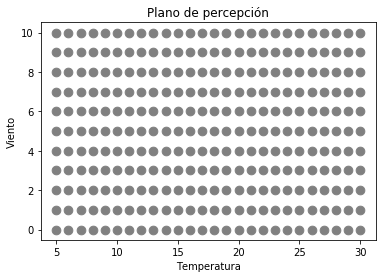

In [5]:
plano_Coordenadas_X = []
plano_Coordenadas_Y = []
plano = []
color = []
i = 0
j = 0
for x in range(temp_inicial,temp_final+1):
    for y in range(viento_inicial,viento_final+1):     
        plano_Coordenadas_X.append(x)
        plano_Coordenadas_Y.append(y)
        flag = 0
        for p in range(0,len(datos)):
            if plano_Coordenadas_X[i] == punto_Conocido_X[p]:
                if plano_Coordenadas_Y[j] ==  punto_Conocido_Y[p]:
                    if percepcion_Conocida[p] == 'cold':
                        color.append('blue')
                    elif percepcion_Conocida[p] == 'warm':
                        color.append('red')
                    p = p + 1
                    flag = 1
        if flag == 0:
            color.append('gray')
        i=i+1
        j=j+1

plano_Coordenadas = {'X':plano_Coordenadas_X,
                     'Y':plano_Coordenadas_Y, 
                     'C':color}
plt.title(u'Plano de percepción')
plt.xlabel(u'Temperatura')
plt.ylabel(u'Viento')
plt.scatter(plano_Coordenadas['X'], 
            plano_Coordenadas['Y'], 
            c='gray', 
            s=[75])
plt.show()

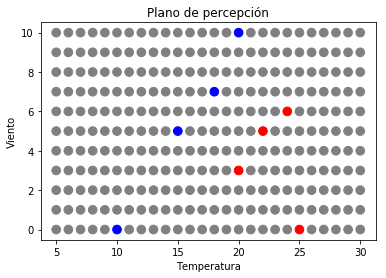

In [6]:
plt.title(u'Plano de percepción')
plt.xlabel(u'Temperatura')
plt.ylabel(u'Viento')
plt.scatter(plano_Coordenadas['X'], 
            plano_Coordenadas['Y'], 
            c=plano_Coordenadas['C'], 
            s=[75])
plt.show()

In [7]:
def distancias(plano_Coordenadas_X, 
              plano_Coordenadas_Y, 
              punto_Conocido_X, 
              punto_Conocido_Y,
              temp_inicial,temp_final,
              viento_inicial,viento_final):
    posicion = []
    guar_dis = 0
    distancia = 0
    p2 = 0
    for x in range(temp_inicial,temp_final+1):
        for y in range(viento_inicial,viento_final+1):
            for p in range(0,len(datos)+1):
                if p < len(datos):
                    distancia_X = punto_Conocido_X[p] - x
                    distancia_Y = punto_Conocido_Y[p] - y
                    if distancia_X < 0:
                        distancia_X = distancia_X*-1
                    if distancia_Y < 0:
                        distancia_Y = distancia_Y*-1
                guar_dis = distancia
                guar_p = p2
                p2 = p
                distancia = distancia_X + distancia_Y
                if p != 0:
                    if guar_dis < distancia:
                        distancia = guar_dis
                        p2 = guar_p
                    elif guar_dis > distancia:
                        distancia = distancia
                        p2 = p2
            posicion.append(guar_p)
    return(posicion)

puntos_cercanos = distancias(plano_Coordenadas_X,
                              plano_Coordenadas_Y,
                              punto_Conocido_X,
                              punto_Conocido_Y,
                              temp_inicial,temp_final,
                              viento_inicial,viento_final)
print(puntos_cercanos)

[0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 5, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 5, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 5, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 5, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 5, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 5, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 5, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 5, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 5, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 5, 3, 3, 3, 3, 2, 2, 4, 4, 4, 4, 5, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 3, 3, 3, 3, 3, 6, 4, 4, 4, 5, 5, 3, 3, 3, 3, 3, 6, 6, 4, 5, 5, 5, 3, 3, 3, 3, 6, 6, 6, 6, 5, 5, 5, 1, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 1, 1, 6, 6, 6, 6, 7, 7, 7, 7, 5, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7]


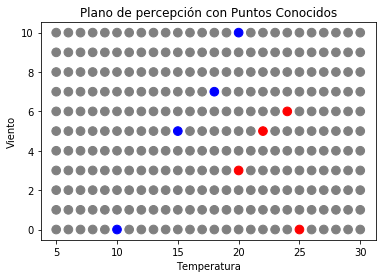

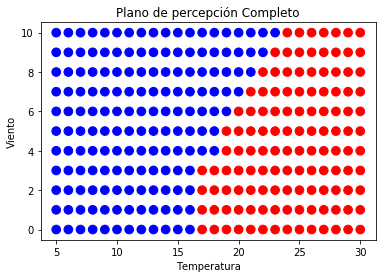

In [8]:
color2 = []
for i in range(0,len(puntos_cercanos)):
    if percepcion_Conocida[puntos_cercanos[i]] == 'cold':
        color2.append('blue')
    elif percepcion_Conocida[puntos_cercanos[i]] == 'warm':
        color2.append('red')

plano_Coordenadas2 = {'X':plano_Coordenadas_X,
                     'Y':plano_Coordenadas_Y, 
                     'C':color2}

plt.title(u'Plano de percepción con Puntos Conocidos')
plt.xlabel(u'Temperatura')
plt.ylabel(u'Viento')
plt.scatter(plano_Coordenadas['X'], 
            plano_Coordenadas['Y'], 
            c=plano_Coordenadas['C'], 
            s=[75])
plt.show()
plt.title(u'Plano de percepción Completo')
plt.xlabel(u'Temperatura')
plt.ylabel(u'Viento')
plt.scatter(plano_Coordenadas2['X'], 
            plano_Coordenadas2['Y'], 
            c=plano_Coordenadas2['C'], 
            s=[75])
plt.show()